<a target="_blank" href="https://colab.research.google.com/github/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/98_1_all_edu.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Upstage Solar Full Stack LLM 101
## Code to Understand!
![Overview](./figures/overview.png)


### Table of Contents
* <b> Session 1. Hello Solar </b> : Obtain an Upstage API Key and use the upstage chat model. <br>
    - 1-1 Interacting with the Solar-1-mini-chat Model
    - 1-2 Using Few-Shot Examples in Chat Completions


- <b> Session 2. Building LLM Applications with LangChain</b> :  Learn how to easily implement LLM chains using LangChain and understand the features of LLMs.<br>
    - 2-1 Prompt Engineering
    - 2-2 Hallucinations
    - 2-3 Groundedness Check with LangChain and Upstage


- <b> Session 3. What is RAG? </b>:  Understand the concept of RAG, load documents, and implement a RAG system.<br>
    - 3-1 Document Parse
    - 3-2 Retrieval Augmented Generation (RAG) for Question Answering
    - 3-3 RAG Limitations <br>


- <b> Session 4. Efficient Text Splitting and Indexing with LangChain </b>:  Efficiently build a RAG system by loading external documents, splitting them into smaller chunks, using embedding APIs to store them in a vectorspace, and retrieving them.<br>

- <b> Session 5. Gradio </b>: Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [1]:
!pip3 install -qU guardrails-ai openai langchain_community langchain_experimental langchain-upstage sentence-transformers langchainhub langchain-chroma langchain matplotlib python-dotenv tavily-python ragas faiss-cpu tokenizers getpass4
!pip3 install -q arize-phoenix[evals]

zsh:1: no matches found: arize-phoenix[evals]


## [Session 1] HELLO SOLAR

  
<b> Introduction to Solar Framework </b>: Learn the basics of setting up the Solar LLM framework and running a simple "Hello, World!" example to understand its core functionality.  

#### UPSTAGE_API_KEY
To obtain your Upstage API key, follow these steps:

1. Visit the Upstage AI console at <https://console.upstage.ai>.
2. Sign up for an account if you don't already have one.
3. Log in to your account.
4. Navigate to the API key section.
5. Generate your API key.
6. Copy the key and save it securely.

![Console](./figures/console.upstage.ai.jpg)

In [2]:
%load_ext dotenv
%dotenv 
# UPSTAGE_API_KEY from https://console.upstage.ai/

In [3]:
# @title set API key
import os
import getpass
from pprint import pprint
import warnings

warnings.filterwarnings("ignore")

from IPython import get_ipython

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata
    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

if "UPSTAGE_API_KEY" not in os.environ:
    os.environ["UPSTAGE_API_KEY"] = getpass.getpass("Enter your Upstage API key: ")


####  1-1 Interacting with the Solar-1-mini-chat Model

This Python code demonstrates how to use the OpenAI API to interact with the Solar-1-mini-chat model provided by Upstage AI.

##### Steps

1. Import necessary libraries: `os`, `openai`, and `pprint`.
2. Set up the OpenAI client with the API key and base URL.
3. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including the system message and user message.
4. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [4]:
import os
from openai import OpenAI
from pprint import pprint

client = OpenAI(
    api_key=os.environ["UPSTAGE_API_KEY"], base_url="https://api.upstage.ai/v1/solar"
)
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='0ad70bd1-a6ea-400d-ab56-917edb34c58f', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Ah, Korea. A fascinating country with a rich history and culture. Korea is actually divided into two separate countries: North Korea and South Korea. South Korea is known for its vibrant economy and advanced technology, while North Korea is a more isolated country with a different political system.\n\nSouth Korea, officially the Republic of Korea, is located in East Asia and has a population of around 51 million people. It's a peninsula surrounded by the Sea of Japan to the east, the Yellow Sea to the west, and the Korea Strait to the south. The capital and largest city is Seoul, which is home to about a quarter of the country's population.\n\nSouth Korea has a diverse geography, with mountainous regions in the east and south, and flat plains in the west and north. The climate varies from subtropical in the south to temperate in 

#### 1-2 Using Few-Shot Examples in Chat Completions

This Python code demonstrates how to use few-shot examples in the OpenAI Chat Completions API to provide context and guide the model's responses.

##### Steps

1. Set up the OpenAI client with the API key and base URL.
2. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including:
     - System message: Defines the assistant's role.
     - Few-shot examples: Provide context and desired behavior.
     - User input: The actual user query.
3. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [5]:
# few shots: examples or history
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        # examples
        {"role": "user", "content": "What is the capital of France?"},
        {
            "role": "assistant",
            "content": "I know of it. It's Paris!!",
        },
        # user input
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='df1979da-b0e3-4456-8759-edfd22ff72a6', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="I'm not sure, but I'll try to find out.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1730447647, model='solar-mini-240612', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=55, total_tokens=71, completion_tokens_details=None, prompt_tokens_details=None))
Message only:
"I'm not sure, but I'll try to find out."


## [Session 2] Building LLM Applications with LangChain

This Python code demonstrates how to use the LangChain library to build applications with Large Language Models (LLMs). It covers the basic steps of defining an LLM, creating a chat prompt, defining a chain, and invoking the chain.

#### Steps

1. Define your favorite LLM:
   - Import the `ChatUpstage` class from `langchain_upstage`.
   - Create an instance of `ChatUpstage` and assign it to the variable `llm`.

2. Define a chat prompt:
   - Import the `ChatPromptTemplate` class from `langchain_core.prompts`.
   - Create a `ChatPromptTemplate` instance using the `from_messages()` method.
   - Provide a list of messages, including system messages, example conversations, and user input.

3. Define a chain:
   - Import the `StrOutputParser` class from `langchain_core.output_parsers`.
   - Create a chain by combining the `rag_with_history_prompt`, `llm`, and `StrOutputParser()` using the pipe (`|`) operator.

4. Invoke the chain:
   - Call the `invoke()` method on the `chain` object, passing an empty dictionary (`{}`) as the input.
   - Print the response obtained from the chain.

In [6]:
# Quick hello world
from langchain_upstage import ChatUpstage

llm = ChatUpstage()
llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm an artificial intelligence and don't have feelings, so I'm always doing well. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 16, 'total_tokens': 47, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'solar-mini-240612', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-4d8f2659-ff97-4501-aa92-e458ef6ccd65-0', usage_metadata={'input_tokens': 16, 'output_tokens': 31, 'total_tokens': 47, 'input_token_details': {}, 'output_token_details': {}})

In [7]:
# langchain, 1. llm define, 2. prompt define, 3. chain, 4. chain.invoke

# 1. define your favorate llm, solar
from langchain_upstage import ChatUpstage

llm = ChatUpstage()

# 2. define chat prompt
from langchain_core.prompts import ChatPromptTemplate

rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about Korea?"),
    ]
)

# 3. define chain
from langchain_core.output_parsers import StrOutputParser

chain = rag_with_history_prompt | llm | StrOutputParser() 

# 4. invoke the chain
c_result = chain.invoke({})
print(c_result)

Seoul is the capital of South Korea.


### 2-1 Prompt Engineering

#### Parameterized Prompt Templates in LangChain

##### Overview

- Prompt templates allow for reusable and modular prompts
- They improve maintainability compared to using raw prompt strings
- {country} value can be set from outside

In [8]:
# parameterized prompt template
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about {country}?"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser()

# 4. invoke chain with param
print(chain.invoke({"country": "Korea"}))
print("---")
print(chain.invoke({"country": "Japan"}))

Oh, I didn't know that! But I'll learn it. The capital of Korea is Seoul.
---
Oh, I'm not sure about that one. Let me think...


#### Leveraging Message History in LangChain Prompts

- LangChain provides powerful tools for managing conversation history
- `MessagesPlaceholder` allows for dynamic inclusion of message history
- `HumanMessage` and `AIMessage` classes represent individual messages
- Combining message history with user input enables context-aware responses

In [9]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = [
    HumanMessage("What is the capital of France?"),
    AIMessage("It's Paris!!"),
]

chain = rag_with_history_prompt | llm | StrOutputParser()
chain_result = chain.invoke({"history": history, "input": "What about Korea?"})
print(chain_result)

The capital of North Korea is Pyongyang, and the capital of South Korea is Seoul.


#### Learn more advanced techniques by reading blog posts on Prompt Engineering!
- Langchain Documentation : <br>
    https://python.langchain.com/v0.2/docs/concepts/#prompt-templates

1. [[Prompt Engineering - Part 1] Maximizing the Use of LLM with Prompt Design](https://www.upstage.ai/feed/insight/prompt-engineering-guide-maximizing-the-use-of-llm-with-prompt-design)
2. [[Prompt Engineering - Part 2] The Essence of Prompt Engineering: A Comprehensive Guide to Maximizing LLM Usage](https://www.upstage.ai/feed/insight/prompt-engineering-guide-to-maximizing-llm-usage)


### 2-2 Hallucinations

<b> Understanding Model Hallucinations </b> : Discover how to identify, understand, and mitigate hallucinations to ensure accurate and reliable model outputs.

![Hallucination](./figures/hallucination.png)

In [10]:
# Cannot say "I don't know" :-)
# Because it is trained to complete the sentence and try to answer the question
llm.invoke("What is Upstage DUS technique?")

AIMessage(content='Upstage DUS technique is a method used in the field of software development to identify and prioritize the most critical defects in a software system. It stands for "Upstage Defects Under Stress."\n\nThe Upstage DUS technique involves subjecting the software to a series of stress tests, which are designed to simulate real-world usage scenarios. These tests are designed to identify and isolate defects that may not be apparent under normal usage conditions.\n\nOnce the defects have been identified, they are prioritized based on their potential impact on the software\'s functionality and the user experience. The most critical defects are then addressed first, followed by less critical defects.\n\nThe Upstage DUS technique is often used in the testing phase of software development to ensure that the software is of high quality and meets the user\'s needs. It is a useful tool for identifying and addressing defects that may not be apparent through other testing methods, an

#### Next Token Prediction
They are designed to generate the next words. It's also very difficult to know what we don't know.

![image](https://jalammar.github.io/images/xlnet/gpt-2-autoregression-2.gif)

Image from https://jalammar.github.io/illustrated-gpt2/

### How Can We Mitigate Hallucinations?

### 2-3 Groundedness Check with LangChain and Upstage
![Groundedness](./figures/gc.png)

[Groundedness Check](https://developers.upstage.ai/docs/apis/groundedness-check)

#### High-Level Overview

The provided code demonstrates how to perform a groundedness check using the LangChain library and the Upstage model. The groundedness check is a process of verifying whether the generated response is grounded in the given context. This is an important step in ensuring the quality and relevance of the generated output.

The code uses the `UpstageGroundednessCheck` class from the `langchain_upstage` module to perform the groundedness check. It takes the context (a string of unique documents) and the generated response as input, and returns a verdict indicating whether the response is grounded or not.

#### Detailed Explanation

1. The code starts by importing the necessary module:
   - `UpstageGroundednessCheck` from `langchain_upstage`: This class is used to perform the groundedness check.
   

2. An instance of the `UpstageGroundednessCheck` class is created and assigned to the variable `groundedness_check`.

3. The input for the groundedness check is prepared by creating a dictionary called `request_input`:
   - The `"context"` key is assigned the value of `str(unique_docs)`, which represents the unique documents as a string.
   - The `"answer"` key is assigned the value of `response`, which represents the generated response.
   

4. The `invoke` method of the `groundedness_check` instance is called with the `request_input` as an argument. This method performs the groundedness check and returns the verdict.

5. The verdict is stored in the `gc_result` variable and printed to the console using `print(gc_result)`.

6. The code then checks if the `gc_result` starts with the word "grounded" (case-insensitive):
   - If the response starts with "grounded", it means the groundedness check has passed, and the message "✅ Groundedness check passed" is printed.
   - If the response does not start with "grounded", it means the groundedness check has failed, and the message "❌ Groundedness check failed" is printed.


The provided code demonstrates a simple yet effective way to perform a groundedness check using LangChain and Upstage. By verifying whether the generated response is grounded in the given context, it helps ensure the quality and relevance of the output.

Groundedness checks are an important step in building reliable and trustworthy language models and conversational agents. They help prevent the generation of irrelevant, inconsistent, or factually incorrect responses.

By using the `UpstageGroundednessCheck` class from LangChain, developers can easily integrate groundedness checks into their language model pipelines and improve the overall performance of their systems.

In [11]:
# GC
from langchain_upstage import UpstageGroundednessCheck

groundedness_check = UpstageGroundednessCheck()

context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Upstage."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

print(gc_result)
if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

grounded
✅ Groundedness check passed


In [12]:
context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Google."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

❌ Groundedness check failed


## [Session 3] What is RAG?


Provide context and allow the language model to respond within that context only.

![Overview](./figures/rag.png)

### 3-1 Docuemnt Parse

Leveraging Document Parse and LangChain for Efficient Text Splitting and Vectorization

- Upstage Document Parse extracts layouts, tables, and figures from any document
- LangChain provides powerful tools for text splitting and vectorization

![Layout Analyzer](./figures/la.png)

In [35]:
from langchain_upstage import (
    UpstageDocumentParseLoader,
    UpstageGroundednessCheck,
    ChatUpstage,
    UpstageEmbeddings,
)

from langchain_chroma import Chroma


layzer = UpstageDocumentParseLoader("pdfs/solar_paper_2.pdf", output_format='html')
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.lazy_load()

In [36]:
for doc in docs:
    pprint(doc.page_content[:100])

("<h1 id='0' style='font-size:20px'>SOLAR 10.7B: Scaling Large Language Models "
 'with Simple yet Effecti')


In [37]:
from IPython.display import display, HTML

display(HTML(docs[0].page_content[:1000]))

### 3-2 Retrieval Augmented Generation (RAG) for Question Answering

- RAG combines retrieval and generation to enhance LLM performance on specific tasks
- Relevant context is retrieved from external data sources and added to the prompt
- The augmented prompt is then passed to the LLM for generating a response
- RAG is particularly useful for question answering on custom datasets

In [38]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question considering the history of the conversation. 
If you don't know the answer, just say that you don't know. 
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = []

chain = rag_with_history_prompt | llm | StrOutputParser()
query1 = "Performance comparison amongst the merge candidate"
response1 = chain.invoke({"history": history, "context": docs, "input": query1})
print("RESPONSE1\n", response1) 

RESPONSE1
 The performance comparison amongst the merge candidates is presented in Table 6. The table shows the scores of two merge candidates, 'Cand. 1' and 'Cand. 2', on various tasks. 'Cand. 1' and 'Cand. 2' are trained using the same setting as 'DPO v2' and 'DPO v3', respectively, but with slightly different hyper-parameters. The table includes the scores for H6 (average of six tasks), ARC, HellaSwag, MMLU, TruthfulQA, Winogrande, and GSM8K. The best scores for H6 and the individual tasks are shown in bold.


In [39]:
history = [HumanMessage(query1), AIMessage(response1)]
query2 = "How about Ablation studies?"
response2 = chain.invoke({"history": history, "context": docs, "input": query2})
print("RESPONSE2\n", response2)

RESPONSE2
 Ablation studies are experiments designed to evaluate the impact of specific components or changes in a model or system. In the context of the paper you provided, there are several ablation studies mentioned:

1. Ablation on the training datasets: This study investigates the effect of different datasets used for instruction tuning and direct preference optimization (DPO) during the alignment tuning stage. The results are presented in Tables 3 and 4.

2. Ablation on the SFT base models: This study tests the impact of using different instruction-tuned models as the base for DPO. The results are presented in Table 5.

3. Ablation on the merge methods: This study evaluates the effect of different merge methods used to combine the models trained for DPO. The results are presented in Table 7.

These ablation studies help understand the contributions of different components and changes to the overall performance of the model.


### 3-3  RAG Limitations
- LLM does not have long enough context length
- Sending long, irrelevant info is inefficient

In [60]:
# Let's load something big
layzer = UpstageDocumentParseLoader(
    "pdfs/kim-tse-2008.pdf", output_format="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.load()

In [41]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question considering the history of the conversation. 
If you don't know the answer, just say that you don't know. 
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser()
query1 = "What is bug classification?"

try:
    response1 = chain.invoke({"history": history, "context": docs, "input": query1})
    print(response1)
except Exception as e:
    print(e)

Error code: 400 - {'error': {'message': "This model's maximum context length is 32768 tokens. However, your messages resulted in 61912 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}


In [42]:
print(len(docs[0].page_content))

110652


In [43]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_pretrained("upstage/solar-1-mini-tokenizer")

In [44]:
text = "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."

enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁Nice', '▁to', '▁meet', '▁you', '.', '▁I', '▁am', '▁Solar', '▁LL', 'M', ',', '▁a', '▁large', '▁language', '▁model', '▁developed', '▁by', '▁Up', 'stage', '.', '▁If', '▁you', '▁have', '▁any', '▁questions', ',', '▁please', '▁feel', '▁free', '▁to', '▁ask', '.']
Number of tokens: 33


In [45]:
text = "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁만나', '서', '▁반가', '워', '요', '.', '▁저는', '▁Up', 'stage', '에서', '▁개발한', '▁대규모', '▁언어', '▁모델', '인', '▁Solar', '▁LL', 'M', '▁입니다', '.', '▁궁금한', '▁것이', '▁있으', '시면', '▁무엇이', '든', '▁물어', '보세요', '.']
Number of tokens: 30


In [46]:
def num_of_tokens(text):
    return len(tokenizer.encode(text).tokens)

In [47]:
print(
    "ENG",
    num_of_tokens(
        "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."
    ),
)
print(
    "KOR",
    num_of_tokens(
        "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
    ),
)

ENG 33
KOR 30


In [48]:
# Recall
# Let's load something big
# layzer = UpstageLayoutAnalysisLoader("pdfs/kim-tse-2008.pdf", output_type="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
# docs = layzer.load()  # or layzer.lazy_load()
print("String length", len(docs[0].page_content))
print("Number of tokens", num_of_tokens(docs[0].page_content))

String length 110652
Number of tokens 36406


## [Session 4] Efficient Text Splitting and Indexing with LangChain


### Steps
<b> 1. Load Documents </b>

The first step is to load the source documents that will be used to augment the language model's knowledge
This could be done by reading files from disk, pulling from a database, scraping web pages, etc.
The goal is to get the raw text content into a format that can be further processed

<b>2. Chunking/Splitting</b>

* Long documents need to be broken down into smaller chunks that are a manageable size for embedding and retrieval
Common approaches include:
  * Fixed-size chunking - split text into equal sized chunks based on character or token count 
  * Semantic chunking - split based on semantic boundaries like sentences, paragraphs, or sections
  * Hierarchical chunking - create chunks at multiple levels of granularity
The ideal chunk size depends on the embedding model, retrieval use case, and downstream task

<b>3. Embedding & Indexing</b>

* The text chunks are converted to vector embeddings using a model like Upstage embeddings
* The embeddings are indexed and stored in a vector database to enable efficient similarity search 
* Metadata about the source chunks can also be stored alongside the embeddings

<b>4. Retrieval</b>

* At query time, the user's question is itself embedded as a query vector
* The query embedding is used to find the most similar document chunks in the vector index 
* Top-k most relevant chunks are retrieved and can be used to augment the prompt sent to the language model to generate an answer

#### RecursiveCharacterTextSplitter

 `RecursiveCharacterTextSplitter` class is designed to be recursively split so that semantically related pieces remain together. <br>
 During this process, a list of delimiter characters `(['\n\n', '\n', ' ', ''])` is used sequentially to partition the text. 
- This splitting continues until the resulting chunks are smaller than the specified `chunk_size`. 
- The `chunk_overlap` parameter defines the number of characters that should overlap between the divided text chunks.

In [93]:
# RAG 1. load doc (done), 2. chunking, splits, 3. embeding - indexing, 4. retrieve

layzer = UpstageDocumentParseLoader( "pdfs/kim-tse-2008.pdf", output_format='html', coordinates= False)
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.lazy_load()

In [95]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# 2. Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
splits = text_splitter.split_documents(docs)
print("Splits:", len(splits)) 

Splits: 109


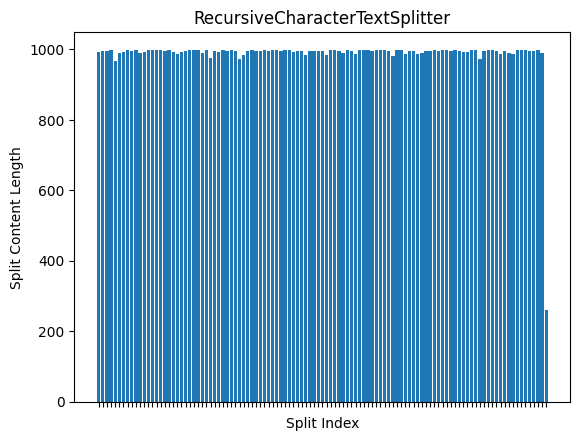

In [96]:
import matplotlib.pyplot as plt

split_lengths = [len(split.page_content) for split in splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.title("RecursiveCharacterTextSplitter")
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.xticks(range(len(split_lengths)), [])
plt.show()

In [98]:
%%time
from langchain.docstore.document import Document

# 3. Embed & indexing
vectorstore = Chroma.from_documents(
     documents= splits, embedding=UpstageEmbeddings(model="solar-embedding-1-large")
)

CPU times: user 2.16 s, sys: 99 ms, total: 2.26 s
Wall time: 14 s


In [99]:
# 4. retrive
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
result_docs = retriever.invoke("What is Bug Classification?")
print(len(result_docs))
print(result_docs[0].page_content[:100])

3
as buggy or clean.</p><br><p id='49' data-category='paragraph' style='font-size:16px'>Similar in spi


#### SemanticChunker

SemanticChunker is an experimental feature in LangChain that serves to split text into semantically similar chunks.

![Overview](./figures/semantic_chunker.png)

In [100]:
# 2-2. SemanticChunker Split
from langchain_community.utils.math import cosine_similarity
from langchain.docstore.document import Document


def semantic_chunker(
    docs,
    min_chunk_size=100,
    chunk_overlap=10,
    max_chunk_size=1000,
    merge_threshold=0.7,
    embeddings=UpstageEmbeddings(model="solar-embedding-1-large"),
):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=min_chunk_size, chunk_overlap=chunk_overlap
    )
    init_splits = text_splitter.split_documents(docs)
    splits = []

    base_split_text = None
    base_split_emb = None
    for split in init_splits:
        if base_split_text is None:
            base_split_text = split.page_content
            base_split_emb = embeddings.embed_documents([base_split_text])[0]
            continue

        split_emb = embeddings.embed_documents([split.page_content])[0]
        distance = cosine_similarity(X=[base_split_emb], Y=[split_emb])
        if (
            distance[0][0] < merge_threshold
            or len(base_split_text) + len(split.page_content) > max_chunk_size
        ):
            splits.append(Document(page_content=base_split_text))
            base_split_text = split.page_content
            base_split_emb = split_emb
        else:
            base_split_text += split.page_content

    if base_split_text:
        splits.append(Document(page_content=base_split_text))

    return splits

#### HuggingFaceEmbeddings
Since it's just an approximation, it's acceptable to use very light embedding models like KLUE, https://huggingface.co/klue.

In [101]:
%%time
from langchain_community.embeddings import HuggingFaceEmbeddings

hfembeddings = HuggingFaceEmbeddings(model_name="klue/roberta-small")

No sentence-transformers model found with name klue/roberta-small. Creating a new one with mean pooling.
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-small and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 76.6 ms, sys: 349 ms, total: 426 ms
Wall time: 2.03 s


In [102]:
%%time
semantic_splits = semantic_chunker(docs, merge_threshold=0.8, embeddings=hfembeddings)
print("SemanticChunker Splits:", len(semantic_splits))

SemanticChunker Splits: 210
CPU times: user 39.8 s, sys: 6.89 s, total: 46.7 s
Wall time: 51.1 s


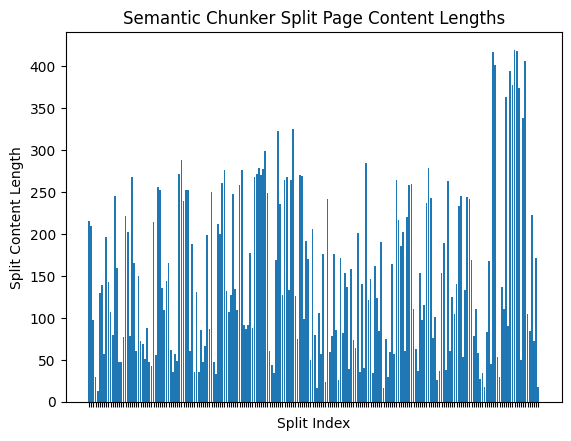

In [103]:
import matplotlib.pyplot as plt

split_lengths = [num_of_tokens(split.page_content) for split in semantic_splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.title("Semantic Chunker Split Page Content Lengths")
plt.xticks(range(len(split_lengths)), [])
plt.show()

### ChromaParallel Class: Parallel Document Embedding
The ChromaParallel class is an extension of the Chroma class to enable parallel processing of document embedding and storage using multiple worker processes.

Chroma is an AI-native open source vector database designed to enhance developer productivity and satisfaction. It is licensed under the Apache 2.0 license. 

- <b> Generate Vectorspace </b> : The `from_documents` class method creates a vector store from a list of documents.

##### Reference

* [Chroma LangChain Documentation](https://python.langchain.com/v0.2/docs/integrations/vectorstores/chroma/)
* [Chroma Official Documentation](https://docs.trychroma.com/getting-started)

In [105]:
import asyncio


class ChromaParallel(Chroma):

    async def afrom_documents(documents, embedding, num_workers=2):
        db = Chroma(embedding_function=embedding)
        # create list of num_workers empty lists
        doc_groups = [[] for _ in range(num_workers)]

        for i in range(len(documents)):
            doc_groups[i % num_workers].append(documents[i])

        tasks = [db.aadd_documents(group) for group in doc_groups]
        await asyncio.gather(*tasks)
        return db

In [106]:
import asyncio
import time

now = time.time()

# 3. Embed & indexing
loop = asyncio.get_event_loop()
semantic_vectorstore = await ChromaParallel.afrom_documents(
    documents=semantic_splits,
    embedding=UpstageEmbeddings(model="solar-embedding-1-large"),
    num_workers=3,
)
semantic_retriever = semantic_vectorstore.as_retriever(search_kwargs={"k": 3})

# 4. retrive
result_docs = semantic_retriever.invoke("What is Bug Classification?")
print(result_docs[1])
print(f"Wall time: {time.time() - now:.2f} sec")

page_content='as buggy or clean.</p><br><p id='49' data-category='paragraph' style='font-size:16px'>Similar in spirit to change classification is work that<br>classifies bug reports or software maintenance requests [3],<br>[10]. In this research, keywords in bug reports or change<br>requests are extracted and used as features to train a<br>machine learning classifier. The goal of the classification is<br>to place a bug report into a specific category or to find the<br>developer best suited to fix a bug. This work, along with<br>change classification, highlights the potential of using<br>machine learning techniques in software engineering. If</p><header id='50' style='font-size:14px'>184</header><br><header id='51' style='font-size:14px'>IEEE TRANSACTIONS ON SOFTWARE ENGINEERING, VOL. 34, NO. 2, MARCH/APRIL 2008</header><p id='52' data-category='paragraph' style='font-size:16px'>an existing concern such as assigning bugs to developers<br>can be recast as a classification problem, then i

In [107]:
# Finally query using RAG
query = "What is bug classification? How it works?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

Bug classification is a process in software development that involves categorizing and organizing software bugs based on their characteristics, severity, and impact on the system. It helps developers and quality assurance teams to prioritize and manage bugs effectively.

Here's a general overview of how bug classification works:

1. **Identification**: The first step in bug classification is identifying the bugs. This can be done through various means, such as user feedback, automated testing, or manual testing.

2. **Reporting**: Once a bug is identified, it is reported to the development team. The report usually includes information about the bug, such as its description, steps to reproduce, expected behavior, actual behavior, and the environment where the bug was found.

3. **Triaging**: The development team triages the reported bugs based on their severity, impact on the system, and priority. This process involves assigning a bug severity level (e.g., critical, high, medium, low) a

In [108]:
history = [HumanMessage(query), AIMessage(gc_result)]

query = "Why it is good?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

Bug classification is beneficial for several reasons:

1. **Improved Efficiency**: By categorizing bugs, development teams can focus on the most critical issues first. This prioritization helps to ensure that the most significant problems are addressed promptly, improving the overall efficiency of the development process.

2. **Better Resource Allocation**: With a clear understanding of the nature and severity of bugs, teams can allocate resources more effectively. This could involve assigning specific developers or testers to particular types of bugs or dedicating more time to fixing high-priority issues.

3. **Enhanced Communication**: Classifying bugs provides a common language and framework for communication within the development team and between the team and stakeholders. This makes it easier to discuss and track bugs, share information, and coordinate efforts.

4. **Improved Quality Assurance**: By categorizing bugs, teams can identify patterns and trends that may indicate under

### For an in-depth look at the different types of RAG, please refer to the files '09. Smart RAG' and '10. Tool_RAG'.

- [09. Smart RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/09_Smart_RAG.ipynb)
- [10. Tool_RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/10_tool_RAG.ipynb)

## [Session 5] Gradio

<b> Comprehensive RAG System for PDFs </b> : Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [109]:
!pip install -qU gradio python-dotenv langchain-upstage python-dotenv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [110]:
import gradio as gr

from langchain_upstage import (
    ChatUpstage,
    UpstageEmbeddings,
    UpstageLayoutAnalysisLoader,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)
from langchain_chroma import Chroma

llm = ChatUpstage(streaming=True)

In [111]:
# More general chat
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}"),
    ]
)

In [112]:
chain = chat_with_history_prompt | llm | StrOutputParser()

In [113]:
def chat(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    return chain.invoke({"message": message, "history": history_langchain_format})

In [114]:
with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "How to eat healthy?",
            "Best Places in Korea",
            "How to make a chatbot?",
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot",
    )
    chatbot.chatbot.height = 300

In [ ]:
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


## 🚀 Building Your Own AI-Powered Chatbot! 🤖


Congratulations on completing the course on building chatbots using Language Models (LLMs), Layout Analysis (LA), custom tools, and Groundedness Checks (GC)! Now, showcase your brilliant ideas by participating in a hackathon and leveraging the Solar API! 🚀